## ncp

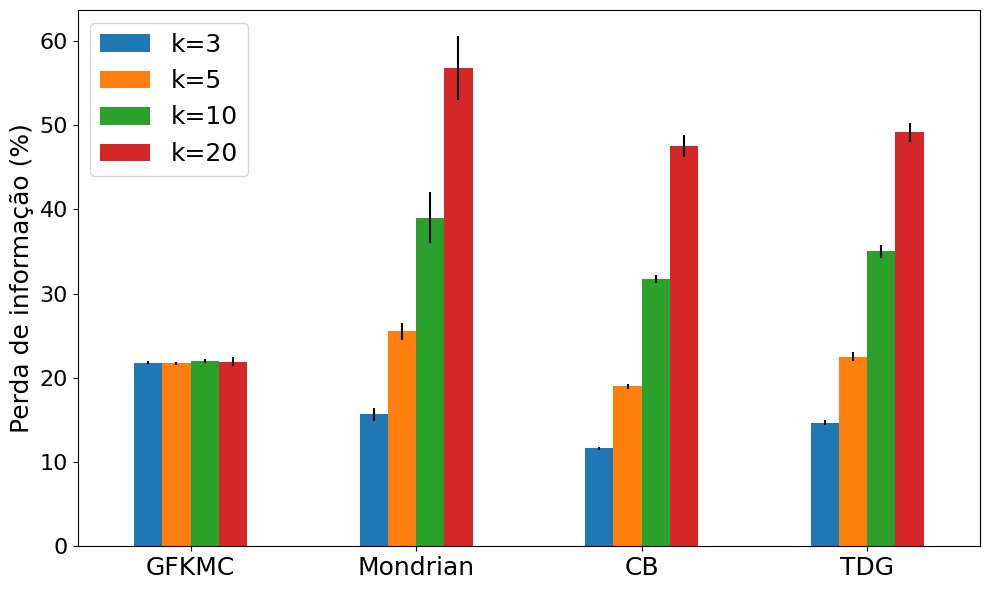

In [86]:
import os
import pandas as pd
import matplotlib.pyplot as plt


anon_methods = ['gfkmc', 'mondrian', 'cb', 'tdg']
xlabels = ['GFKMC', 'Mondrian', 'CB', 'TDG']
fontsize = 18

base_dir = 'results'

dataframes = {}

for anon_method in anon_methods:
    anon_method_path = os.path.join(base_dir, anon_method)

    if os.path.isdir(anon_method_path):
        df = pd.DataFrame()

        for k in [3, 5, 10, 20]:
            k_path = os.path.join(anon_method_path, str(k))

            if os.path.isdir(k_path):
                ncp_values = {}

                for file in os.listdir(k_path):
                    if file.endswith('_ncp.txt'):
                        client_name = f"client_{file.split('_')[0]}"
                        ncp_file_path = os.path.join(k_path, file)

                        with open(ncp_file_path, 'r') as f:
                            ncp_value = f.read().strip()
                            ncp_values[client_name] = float(ncp_value)

                temp_df = pd.Series(ncp_values, name=f'k={k}')
                df = pd.concat([df, temp_df], axis=1)

        df = df.transpose()
        df = df.sort_index(axis=1)
        dataframes[anon_method] = df

# Calculate mean and standard deviation
mean_ncp_values = {anon_method: df.mean(axis=1) for anon_method, df in dataframes.items()}
std_ncp_values = {anon_method: df.std(axis=1) for anon_method, df in dataframes.items()}

mean_ncp_df = pd.DataFrame(mean_ncp_values)
std_ncp_df = pd.DataFrame(std_ncp_values)

mean_ncp_df = mean_ncp_df.transpose()
std_ncp_df = std_ncp_df.transpose()

# Plotting with error bars
ax = mean_ncp_df.plot(kind='bar', yerr=std_ncp_df, figsize=(10, 6), capsize=0)
plt.ylabel('Perda de informação (%)', fontsize=fontsize)  # Increase y-label font size
plt.xticks(rotation=0, fontsize=fontsize-2)  # Increase x-tick font size
plt.yticks(fontsize=fontsize-2)

ax.set_xticklabels(xlabels, fontsize=fontsize)

# Move the legend to the top left and increase font size
legend = plt.legend(loc='upper left', bbox_to_anchor=(0, 1), fontsize=fontsize)

plt.tight_layout()
plt.show()


In [87]:
import os
import pandas as pd

# Define the base directory where your data is stored
base_dir = 'results'  # Change this to your actual path

# List of specific anon_methods to process
anon_methods = ['cb', 'gfkmc', 'mondrian', 'tdg']

# Initialize a dictionary to hold DataFrames for each anon_method
dataframes = {}

for anon_method in anon_methods:
    anon_method_path = os.path.join(base_dir, anon_method)

    if os.path.isdir(anon_method_path):
        # Initialize a DataFrame for this anon_method
        df = pd.DataFrame()

        # Loop through each k directory
        for k in os.listdir(anon_method_path):
            k_path = os.path.join(anon_method_path, k)

            if os.path.isdir(k_path):
                # Initialize a dictionary to hold ncp values for this k
                ncp_values = {}

                # Loop through each file in the k directory
                for file in os.listdir(k_path):
                    if file.endswith('_ncp.txt'):
                        client_name = f"client_{file.split('_')[0]}"  # Extract client name
                        ncp_file_path = os.path.join(k_path, file)

                        # Read the ncp value from the file
                        with open(ncp_file_path, 'r') as f:
                            ncp_value = f.read().strip()  # Read and strip whitespace
                            ncp_values[client_name] = ncp_value

                # Create a DataFrame from ncp_values and set k as the index
                temp_df = pd.Series(ncp_values, name=f'k={k}')
                df = pd.concat([df, temp_df], axis=1)

        # Transpose the DataFrame to have k values as rows and clients as columns
        df = df.transpose()

        # Sort the DataFrame by columns (clients)
        df = df.sort_index(axis=1)  # Sort columns alphabetically

        # Store the DataFrame for this anon_method
        dataframes[anon_method] = df

# Now you can access the DataFrames for each anon_method
print("NCP %")
for anon_method, df in dataframes.items():
    print(f"Anon Method: {anon_method}")
    display(df)  # Use display to show the DataFrame in Jupyter Notebook

NCP %
Anon Method: cb


,client_0,client_1,client_2,client_3,client_4,client_5,client_6,client_7,client_8,client_9
k=3,11.19,11.64,11.59,11.74,11.83,11.84,11.67,11.43,11.57,11.61
k=5,18.68,18.52,19.41,19.14,19.09,18.74,19.46,19.03,19.01,19.05
k=10,31.58,31.47,32.57,32.39,32.36,31.58,31.62,31.10,31.67,31.30
k=20,46.81,48.38,48.63,46.02,48.50,47.25,48.40,44.78,48.30,47.94


Anon Method: gfkmc


,client_0,client_1,client_2,client_3,client_4,client_5,client_6,client_7,client_8,client_9
k=3,21.93,22.16,21.75,21.52,21.90,21.94,21.78,21.73,21.65,21.66
k=5,21.92,21.83,21.71,21.28,21.88,22.01,21.61,21.63,21.60,21.61
k=20,22.19,21.54,22.24,21.89,22.53,22.98,21.73,21.32,21.57,21.39
k=10,21.93,21.86,22.09,21.81,22.29,22.42,21.70,21.91,21.72,21.96


Anon Method: mondrian


,client_0,client_1,client_2,client_3,client_4,client_5,client_6,client_7,client_8,client_9
k=3,14.08,15.92,16.20,16.62,15.36,16.16,15.16,16.29,15.46,15.41
k=5,24.48,25.32,25.20,28.08,25.51,25.10,24.18,25.71,25.62,25.88
k=10,34.93,42.84,36.14,41.95,37.23,43.97,39.93,36.75,39.31,37.26
k=20,54.42,60.30,48.70,54.89,59.19,61.72,60.48,55.59,56.94,55.73


Anon Method: tdg


,client_0,client_1,client_2,client_3,client_4,client_5,client_6,client_7,client_8,client_9
k=3,13.94,14.69,14.60,14.65,14.54,15.03,15.09,14.60,14.72,15.00
k=5,21.90,22.30,22.51,22.23,22.91,22.88,22.47,22.21,21.97,23.65
k=10,34.51,35.08,35.55,34.81,36.12,35.15,36.14,33.37,34.62,34.70
k=20,48.09,48.66,48.96,50.77,49.81,49.68,50.21,47.24,47.93,49.97


## record linkage

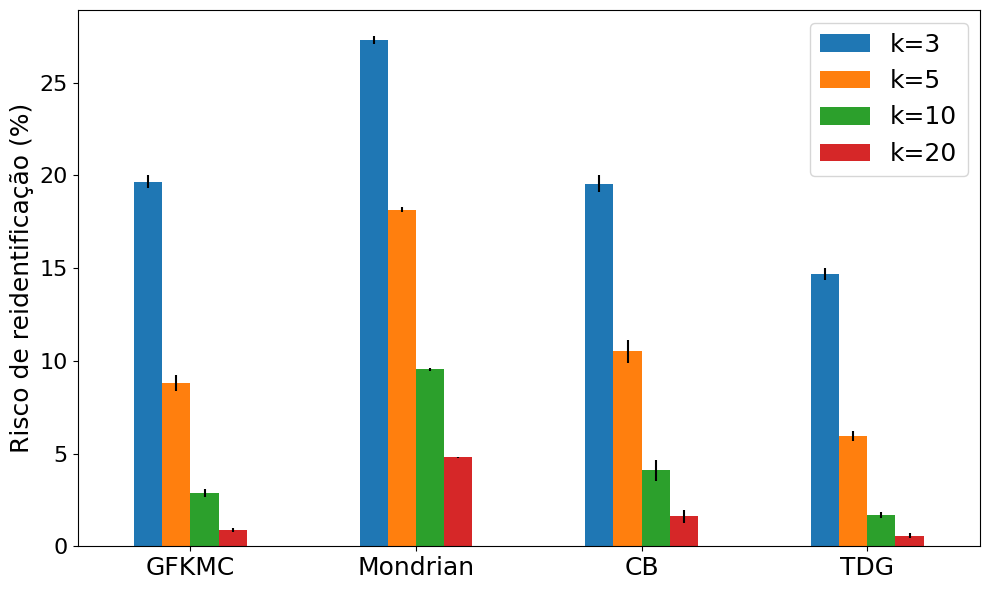

In [88]:
import os
import pandas as pd
import matplotlib.pyplot as plt

base_dir = 'results'
# anon_methods = ['cb', 'gfkmc', 'mondrian', 'tdg']
dataframes = {}

for anon_method in anon_methods:
    anon_method_path = os.path.join(base_dir, anon_method)

    if os.path.isdir(anon_method_path):
        df = pd.DataFrame()

        for k in [3, 5, 10, 20]:
            k_path = os.path.join(anon_method_path, str(k))

            if os.path.isdir(k_path):
                rc_values = {}

                for file in os.listdir(k_path):
                    if file.endswith('_record_linkage.txt'):
                        client_name = f"client_{file.split('_')[0]}"
                        rc_file_path = os.path.join(k_path, file)

                        with open(rc_file_path, 'r') as f:
                            rc_value = f.read().strip()
                            a, b = rc_value.replace('(', '').replace(')', '').split(', ')
                            value = float(a) / float(b)
                            rc_values[client_name] = round(value * 100, 2)

                temp_df = pd.Series(rc_values, name=f'k={k}')
                df = pd.concat([df, temp_df], axis=1)

        df = df.transpose()
        df = df.sort_index(axis=1)
        dataframes[anon_method] = df

# Calculate mean and standard deviation
mean_rc_values = {anon_method: df.mean(axis=1) for anon_method, df in dataframes.items()}
std_rc_values = {anon_method: df.std(axis=1) for anon_method, df in dataframes.items()}

mean_rc_df = pd.DataFrame(mean_rc_values)
std_rc_df = pd.DataFrame(std_rc_values)

mean_rc_df = mean_rc_df.transpose()
std_rc_df = std_rc_df.transpose()

# Plotting with error bars (without caps)
ax = mean_rc_df.plot(kind='bar', yerr=std_rc_df, figsize=(10, 6), capsize=0)  # Set capsize to 0
plt.ylabel('Risco de reidentificação (%)', fontsize=fontsize)  # Increase y-label font size
plt.xticks(rotation=0, fontsize=fontsize-2)  # Increase x-tick font size
plt.yticks(fontsize=fontsize-2)
ax.set_xticklabels(xlabels, fontsize=fontsize)

legend = plt.legend(loc='upper right', fontsize=fontsize)

plt.tight_layout()
plt.show()


In [89]:
import os
import pandas as pd

# Define the base directory where your data is stored
base_dir = 'results'  # Change this to your actual path

# List of specific anon_methods to process
anon_methods = ['cb', 'gfkmc', 'mondrian', 'tdg']

# Initialize a dictionary to hold DataFrames for each anon_method
dataframes = {}

for anon_method in anon_methods:
    anon_method_path = os.path.join(base_dir, anon_method)

    if os.path.isdir(anon_method_path):
        # Initialize a DataFrame for this anon_method
        df = pd.DataFrame()

        # Loop through each k directory
        for k in os.listdir(anon_method_path):
            k_path = os.path.join(anon_method_path, k)

            if os.path.isdir(k_path):
                # Initialize a dictionary to hold ncp values for this k
                rc_values = {}

                # Loop through each file in the k directory
                for file in os.listdir(k_path):
                    if file.endswith('_record_linkage.txt'):
                        client_name = f"client_{file.split('_')[0]}"  # Extract client name
                        ncp_file_path = os.path.join(k_path, file)

                        # Read the ncp value from the file
                        with open(ncp_file_path, 'r') as f:
                            rc_value = f.read().strip()  # Read and strip whitespace
                            a, b = rc_value.replace('(', '').replace(')', '').split(', ')
                            value = float(a) / float(b)
                            rc_values[client_name] = round(value * 100, 2)

                # Create a DataFrame from rc_values and set k as the index
                temp_df = pd.Series(rc_values, name=f'k={k}')
                df = pd.concat([df, temp_df], axis=1)

        # Transpose the DataFrame to have k values as rows and clients as columns
        df = df.transpose()

        # Sort the DataFrame by columns (clients)
        df = df.sort_index(axis=1)  # Sort columns alphabetically

        # Store the DataFrame for this anon_method
        dataframes[anon_method] = df

# Now you can access the DataFrames for each anon_method
print("Record Linkage Matches %")
for anon_method, df in dataframes.items():
    print(f"Anon Method: {anon_method}")
    display(df)  # Use display to show the DataFrame in Jupyter Notebook

Record Linkage Matches %
Anon Method: cb


,client_0,client_1,client_2,client_3,client_4,client_5,client_6,client_7,client_8,client_9
k=3,19.29,19.80,19.73,19.01,19.54,20.13,19.75,19.70,19.51,20.15
k=5,8.36,9.59,8.52,8.07,8.59,9.23,8.93,8.97,8.74,8.86
k=10,3.04,3.10,2.59,2.73,2.75,2.93,2.56,3.13,3.02,2.75
k=20,0.86,0.86,0.80,1.05,0.83,0.87,0.70,1.03,1.03,0.93


Anon Method: gfkmc


,client_0,client_1,client_2,client_3,client_4,client_5,client_6,client_7,client_8,client_9
k=3,27.58,27.35,27.23,27.02,27.41,27.17,27.71,27.40,27.05,27.02
k=5,18.20,18.09,18.11,18.12,18.15,18.27,18.15,18.30,18.21,17.89
k=20,4.79,4.78,4.81,4.78,4.74,4.77,4.75,4.83,4.85,4.78
k=10,9.54,9.59,9.52,9.56,9.46,9.40,9.56,9.60,9.54,9.53


Anon Method: mondrian


,client_0,client_1,client_2,client_3,client_4,client_5,client_6,client_7,client_8,client_9
k=3,20.61,19.80,19.50,19.31,19.77,19.47,19.78,19.20,18.88,19.22
k=5,9.97,11.27,10.91,9.79,10.48,10.77,10.62,10.87,9.34,11.05
k=10,4.95,3.29,4.34,3.86,4.01,3.20,3.98,4.23,4.12,4.88
k=20,2.01,1.32,2.06,1.75,1.49,1.13,1.13,1.83,1.50,1.99


Anon Method: tdg


,client_0,client_1,client_2,client_3,client_4,client_5,client_6,client_7,client_8,client_9
k=3,14.89,14.76,15.19,14.33,14.96,14.33,14.90,14.87,14.36,14.24
k=5,5.88,6.23,5.97,5.83,5.97,5.73,6.57,5.87,5.85,5.71
k=10,1.78,1.91,1.69,1.71,1.36,1.63,1.53,1.67,1.83,1.73
k=20,0.50,0.53,0.46,0.53,0.66,0.50,0.53,0.80,0.73,0.56


## federated learning

### Accuracy

In [90]:

def plot_metric(metric, metric_label, round_label, limits=(0, 1)):
    import os
    import pandas as pd
    import matplotlib.pyplot as plt

    # Define the base directory where your data is stored
    base_dir = 'results'  # Change this to your actual path

    # List of specific anon_methods to process
    anon_methods = ['gfkmc', 'mondrian', 'cb', 'tdg', 'original']
    legend_labels = ['GFKMC', 'Mondrian', 'CB', 'TDG', 'Original']
    # anon_methods = ['cb', 'mondrian', 'original', 'tdg']

    # Loop through each k directory
    for k in [3, 5, 10, 20]:  # Adjust the range based on your k values
        plt.figure(figsize=(12, 6))
        print(f'k={k}')

        for anon_method in anon_methods:
            if anon_method == 'original':
                metrics_file_path = os.path.join(base_dir, anon_method, str(10), f'metrics_{metric}.csv')
            else:
                metrics_file_path = os.path.join(base_dir, anon_method, str(k), f'metrics_{metric}.csv')

            if os.path.exists(metrics_file_path):
                # Read the metrics.csv file
                metrics_df = pd.read_csv(metrics_file_path)

                # Plotting the accuracy over rounds
                plt.plot(metrics_df['round'], metrics_df[metric], marker='o', linestyle='-', label=anon_method)
            else:
                print(f"Metrics file not found for {anon_method} at k={k}: {metrics_file_path}")

        # Set plot title and labels
        # plt.title(f'Accuracy over Rounds for k={k}')
        plt.xlabel(round_label, fontsize=fontsize)
        plt.ylabel(metric_label, fontsize=fontsize)
        plt.xticks([1,10,20,30,40,50,60,70,80,90,100], fontsize=fontsize-2)  # Adjust the range based on your actual round values
        plt.yticks(fontsize=fontsize-2)
        plt.grid()
        plt.ylim(*limits)
        legend = plt.legend(fontsize=fontsize)

        for text, new_label in zip(legend.get_texts(), legend_labels):
            text.set_text(new_label)

        plt.show()


In [91]:
# plot_metric('accuracy', 'Acurácia', 'Rodada')

k=3


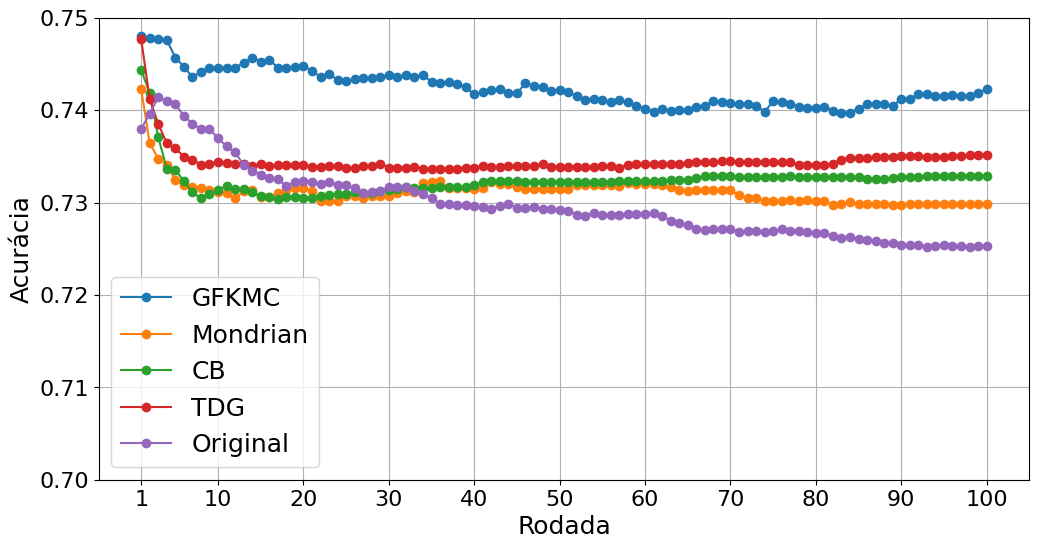

k=5


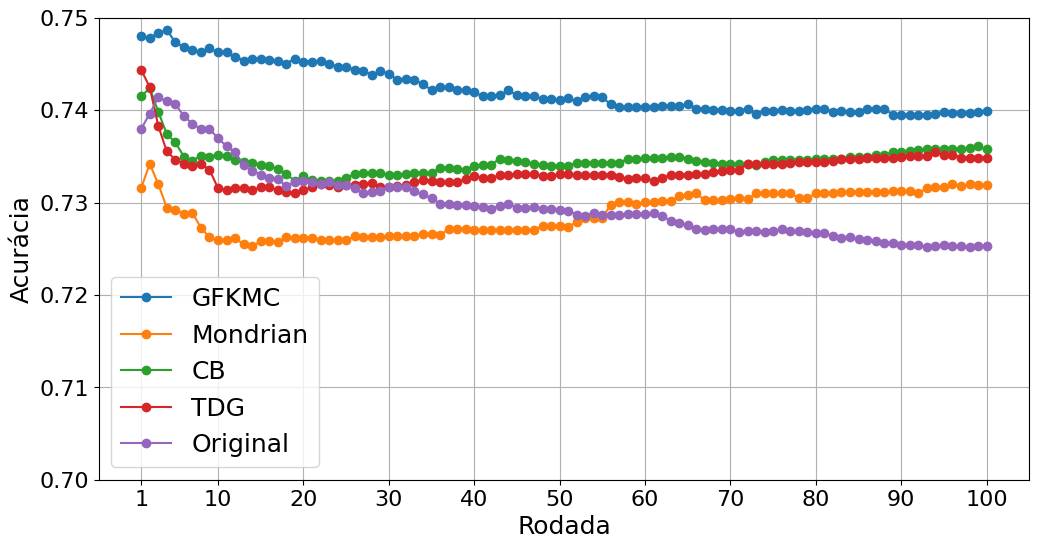

k=10


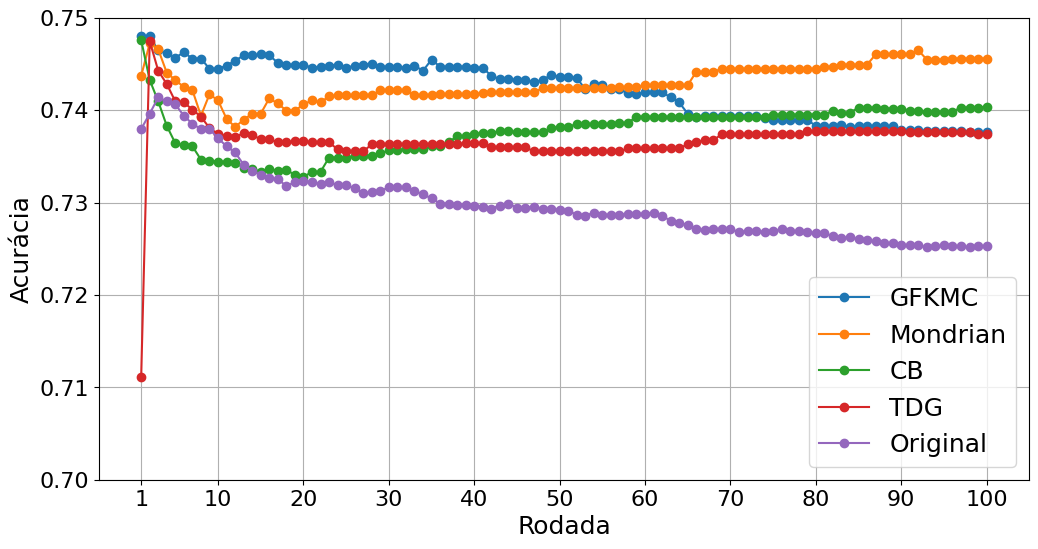

k=20


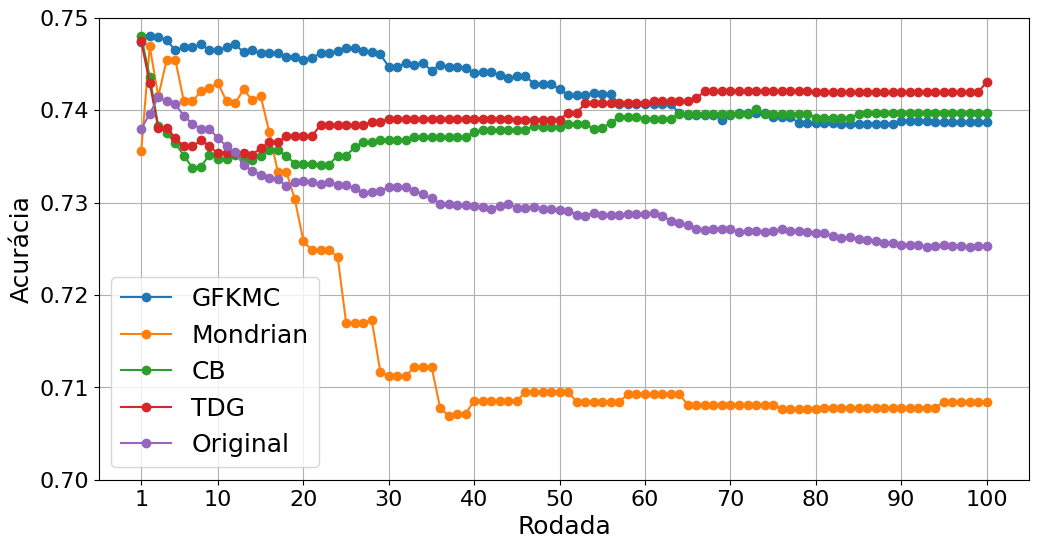

In [92]:
plot_metric('accuracy', 'Acurácia', 'Rodada', limits=(0.70, 0.75))

### Loss

In [93]:
# plot_metric('loss', 'Perda', 'Rodada')


k=3


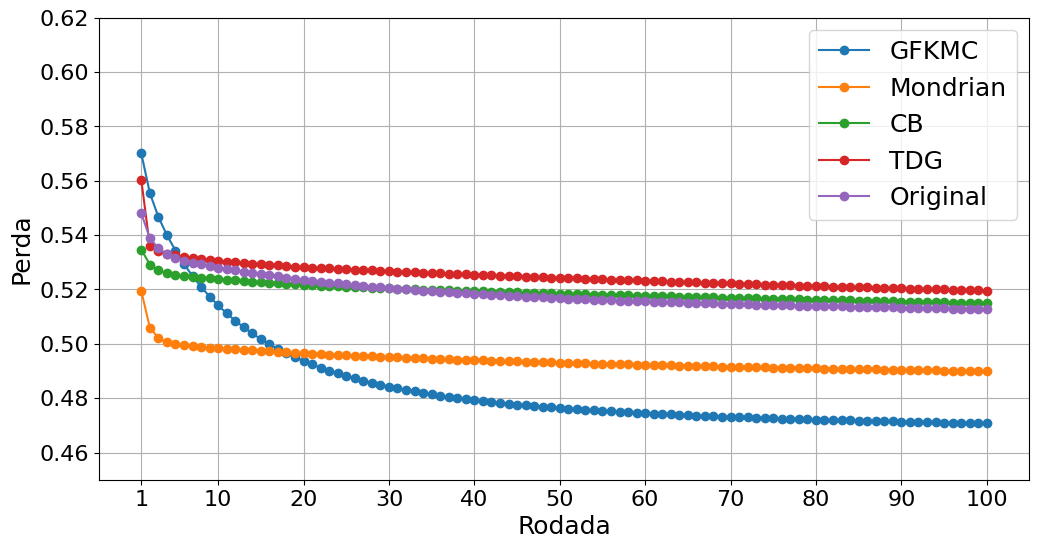

k=5


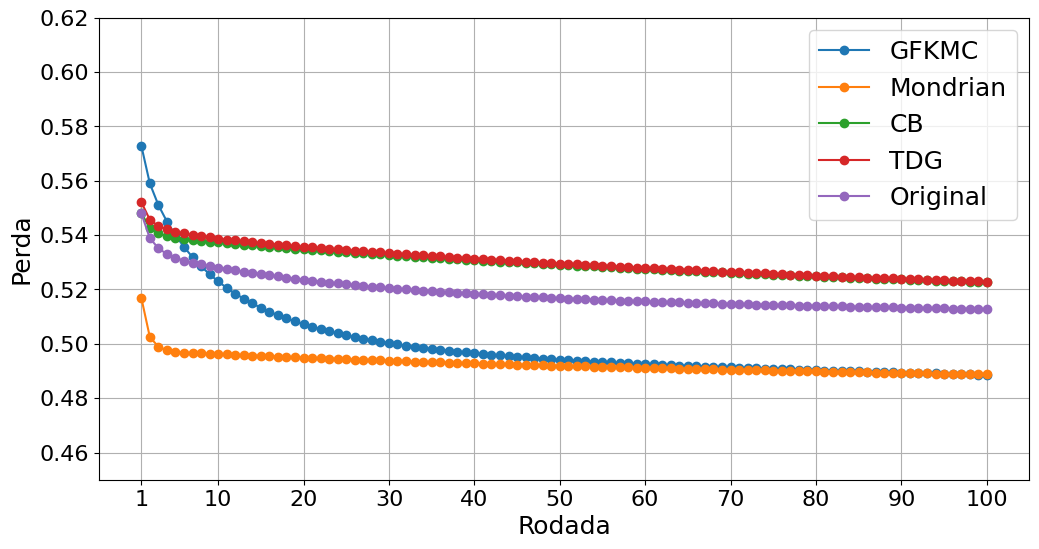

k=10


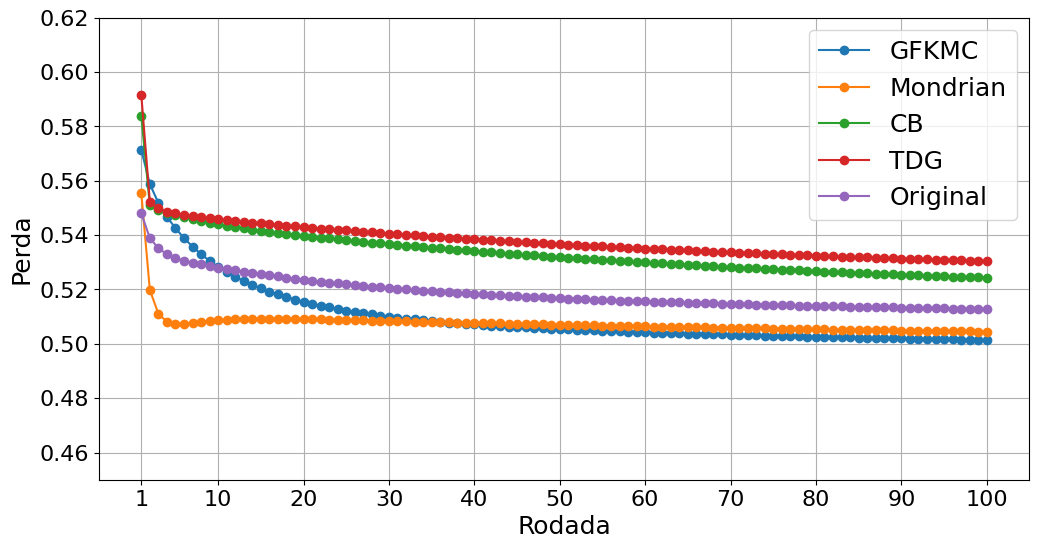

k=20


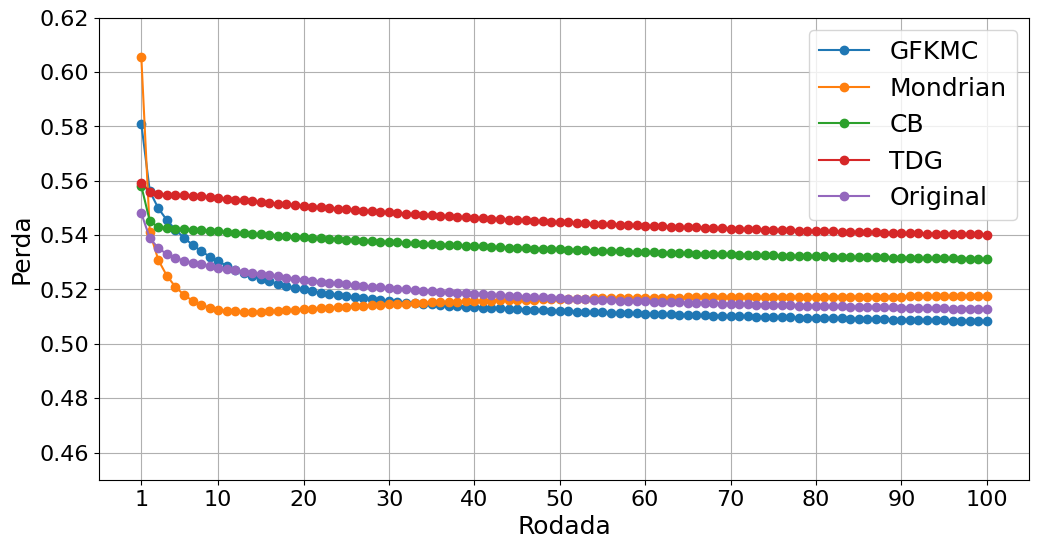

In [94]:
plot_metric('loss', 'Perda', 'Rodada', limits=(0.45, 0.62))
